# **Assignment 1**

1 Use library scripts to generate p-ER random graphs and r-regular random graph. Let K denote the number of nodes.

2 Write a script to check the connectivity of a given graph. algebraic method 1 (irreducibility);
algebraic method 2 (eigenvalue of the Laplacian matrix); breadth-first search algorithm.

3 Compare the complexity as a function of K of the methods above by plotting curves of a complexity measure vs K.

4 Let pc(G) denote the probability that a graph G is connected. By running Monte Carlo simulations, estimate pc(G) and produce two curve plots:

pc (G) vs. p for Erd ̋os-R ́enyi graphs with K = 100.

pc(G) vs. K, for K ≤ 100, for r-regular random graphs with r = 2 and r = 8.

### Import all necessary libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
import os
import seaborn as sns
import pandas as pd

## 1. Use library scripts to generate p-ER random graphs and r-regular random graph

In [2]:
def generate_pER_graph(K, p):
    """
    Generate a p-ER random graph.

    Parameters:
        K (int): Number of nodes.
        p (float): Probability of edge creation.

    Returns:
        nx.Graph: p-ER random graph.
    """
    return nx.erdos_renyi_graph(K, p)

def generate_r_regular_graph(K, r):
    """
    Generate an r-regular random graph.

    Parameters:
        K (int): Number of nodes.
        r (int): Degree of each node.

    Returns:
        nx.Graph: r-regular random graph.
    """
    return nx.random_regular_graph(r, K)


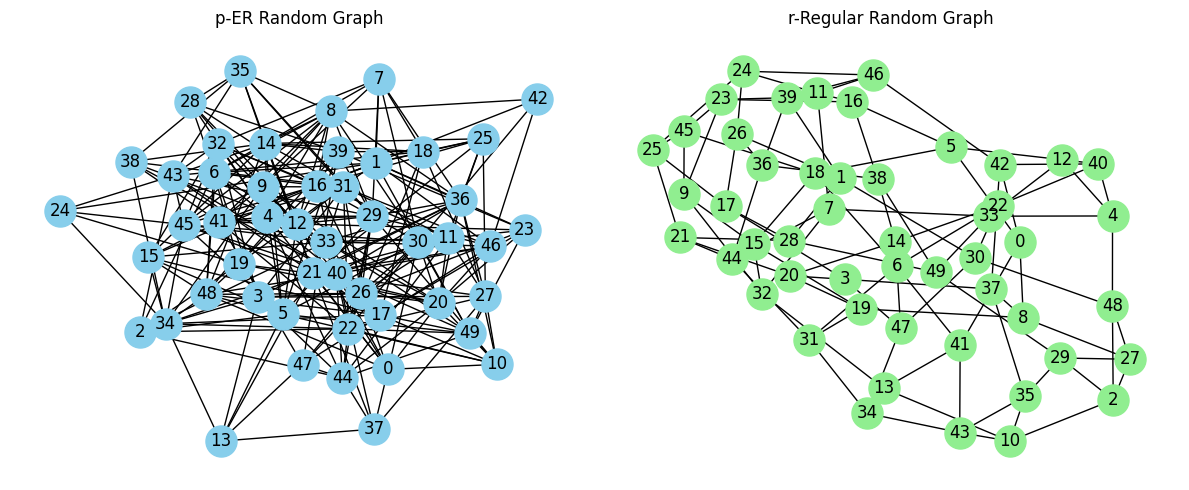

In [3]:
# Example usage:
K = 50  # Number of nodes
p = 0.2  # Probability of edge creation for p-ER random graph
r = 4  # Degree of each node for r-regular random graph

pER_graph = generate_pER_graph(K, p)
r_regular_graph = generate_r_regular_graph(K, r)

# Visualize the graphs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
nx.draw(pER_graph, with_labels=True, node_color='skyblue', node_size=500)
plt.title('p-ER Random Graph')

plt.subplot(1, 2, 2)
nx.draw(r_regular_graph, with_labels=True, node_color='lightgreen', node_size=500)
plt.title('r-Regular Random Graph')

plt.tight_layout()
plt.show()

## 2. Write a script to check the connectivity of a given graph.

### Generate three very simple graphs

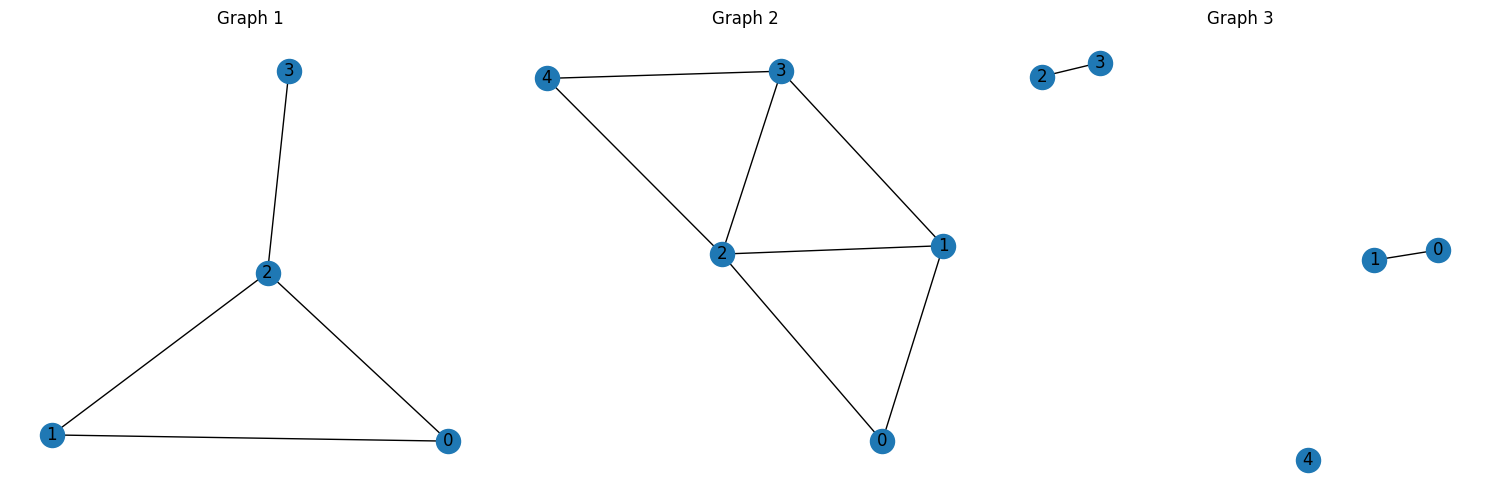

In [4]:
# Example of graphs

# Connected
adj_matrix1 = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 0],
    [1, 1, 0, 1],
    [0, 0, 1, 0]
])

# Connected
adj_matrix2 = np.array([
    [0, 1, 1, 0, 0],
    [1, 0, 1, 1, 0],
    [1, 1, 0, 1, 1],
    [0, 1, 1, 0, 1],
    [0, 0, 1, 1, 0]
])

# Connected
adj_matrix3 = np.array([
    [0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0]
])

# Convert adjacency matrices to NetworkX graphs
G1 = nx.from_numpy_array(adj_matrix1)
G2 = nx.from_numpy_array(adj_matrix2)
G3 = nx.from_numpy_array(adj_matrix3)

# Plotting
plt.figure(figsize=(15, 5))

# Subplot 1
plt.subplot(131)
nx.draw(G1, with_labels=True)
plt.title('Graph 1')

# Subplot 2
plt.subplot(132)
nx.draw(G2, with_labels=True)
plt.title('Graph 2')

# Subplot 3
plt.subplot(133)
nx.draw(G3, with_labels=True)
plt.title('Graph 3')

plt.tight_layout()
plt.show()

### Method 1: BFS

In [5]:
def check_connectivity_bfs(matrix):
    if isinstance(matrix, nx.Graph):
        G = matrix
    else:
        # Create undirected graph from adj_matrix
        G = nx.from_numpy_array(matrix)
    # Traverse the tree using bfs
    bfs_tree = nx.bfs_tree(G, source=0)
    # Check if all nodes were visited
    return len(bfs_tree.nodes) == len(matrix)

In [6]:
print('The graph 1 is connected? ', check_connectivity_bfs(adj_matrix1))
print('The graph 2 is connected? ', check_connectivity_bfs(adj_matrix2))
print('The graph 3 is connected? ', check_connectivity_bfs(adj_matrix3))

The graph 1 is connected?  True
The graph 2 is connected?  True
The graph 3 is connected?  False


### Method 2: Irreduciblity

In [7]:
def check_connectivity_irreducibility(matrix):
    n = len(matrix)
    # Compute I
    identity_matrix = np.identity(n)
    # Calculate the power of the matrix (A + I)^(n-1)
    power_matrix = np.linalg.matrix_power(matrix + identity_matrix, n - 1)
    # Check irreducibility (Wielandt lemma)
    return np.all(power_matrix > 0)

In [8]:
print('The graph 1 is connected? ', check_connectivity_irreducibility(adj_matrix1))
print('The graph 2 is connected? ', check_connectivity_irreducibility(adj_matrix2))
print('The graph 3 is connected? ', check_connectivity_irreducibility(adj_matrix3))

The graph 1 is connected?  True
The graph 2 is connected?  True
The graph 3 is connected?  False


### Method 3 : Eigenvalue of the Laplacian matrix

In [9]:
def check_connectivity_eigen(matrix, tol = 1e-16):
    # Create diagonal matrix D with degree
    # of out going nodes as diagonal elements
    D = np.diag(np.sum(matrix, axis = 1))
    L = D - matrix
    # Get the eigenvalues and sort them
    eigen_vals = np.linalg.eigvalsh(L)
    # Check if the second eigenvalue is greater than zero
    if len(eigen_vals) > 1:
        return eigen_vals[1] > tol # Account for numerical errors
    else:
        return False

In [10]:
print('The graph 1 is connected? ', check_connectivity_eigen(adj_matrix1))
print('The graph 2 is connected? ', check_connectivity_eigen(adj_matrix2))
print('The graph 3 is connected? ', check_connectivity_eigen(adj_matrix3))

The graph 1 is connected?  True
The graph 2 is connected?  True
The graph 3 is connected?  False


### Using random graphs

In [11]:
print(check_connectivity_irreducibility(nx.to_numpy_array(pER_graph)))
print(check_connectivity_bfs(nx.to_numpy_array(pER_graph)))
print(check_connectivity_eigen(nx.to_numpy_array(pER_graph)))

True
True
True


In [12]:
print(check_connectivity_irreducibility(nx.to_numpy_array(r_regular_graph)))
print(check_connectivity_bfs(nx.to_numpy_array(r_regular_graph)))
print(check_connectivity_eigen(nx.to_numpy_array(r_regular_graph)))

True
True
True


# 3. Complexity
Compare the complexity as a function of K of the methods
above by plotting curves of a complexity measure vs K .


---

**Comparison of Methods for Checking Connectivity of Random Networks**

In this study, we examined three different methods to determine whether a random network is connected or not. **We generated random networks using:
 the p-Erdős-Rényi model with variations in network size**. The methods
considered for checking connectivity are:

1. irreducibility method
2. the eigenvalue method of the Laplacian matrix
3. breadth-first search (BFS) algorithm

First we define an helper function to get the execution times

In [14]:
# Helper function to get execution time of a single run
def get_time_run(func, matrix_graph):
    start_time = time.process_time()
    func(matrix_graph)
    end_time = time.process_time()
    return end_time - start_time

**ZOOM IN BFS-Laplacian**

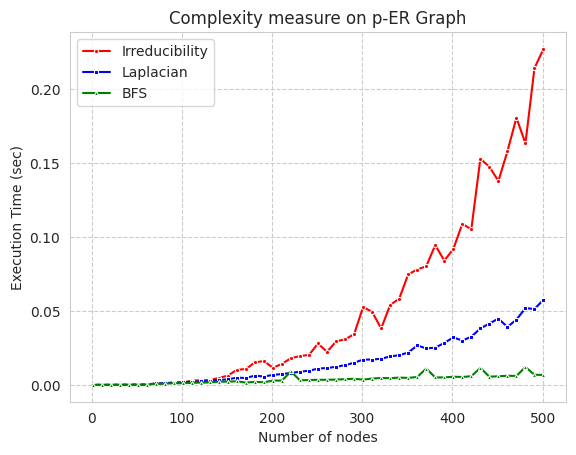

In [27]:
np.seterr(over='ignore')

# Definition of parameters
## K - number of nodes
K_values = np.arange(1, 502, 10)
## Number of repetitions for each value of K to get a robust estimate of execution times
num_repeats = 50

# Initialization of lists for results
irreducibility_times = np.zeros(len(K_values))
laplacian_times = np.zeros(len(K_values))
bfs_times = np.zeros(len(K_values))

# Loop over K to generate graphs and measure execution times
for i, K in enumerate(K_values):
    # Generate a random p-ER graph with K nodes and connection probability 0.2
    graph = nx.erdos_renyi_graph(K, 0.2)
    mat = nx.to_numpy_array(graph)

    # Initialize the times of the 3 methods
    irreducibility_time = 0
    laplacian_time = 0
    bfs_time = 0

    for _ in range(num_repeats):
        # Measure execution times for connectivity check using the irreducibility method
        irreducibility_time += get_time_run(check_connectivity_irreducibility, mat)
        # Measure execution times for connectivity check using the eigenvalue method of the Laplacian matrix
        laplacian_time += get_time_run(check_connectivity_eigen, mat)
        # Measure execution times for connectivity check using BFS
        bfs_time += get_time_run(check_connectivity_bfs, graph)
    irreducibility_times[i] = irreducibility_time/ num_repeats
    laplacian_times[i] = laplacian_time / num_repeats
    bfs_times[i] = bfs_time / num_repeats


df = pd.DataFrame({'Irreducibility': irreducibility_times,
                   'Laplacian': laplacian_times,
                   'BFS': bfs_times,
                   'k': K_values})

sns.set_style("whitegrid", {"axes.grid.color": ".9", "grid.linestyle": "--"})

# Plotting execution times versus K
sns.lineplot(df, x='k', y='Irreducibility', color='red', label='Irreducibility', marker='o', markersize=3)
sns.lineplot(df, x='k', y='Laplacian', color='blue', label='Laplacian', marker='s', markersize=3)
sns.lineplot(df, x='k', y='BFS', color='green', label='BFS', marker='^', markersize=3)
plt.xlabel('Number of nodes')
plt.ylabel('Execution Time (sec)')
plt.title('Complexity measure on p-ER Graph')
plt.legend()
plt.show()


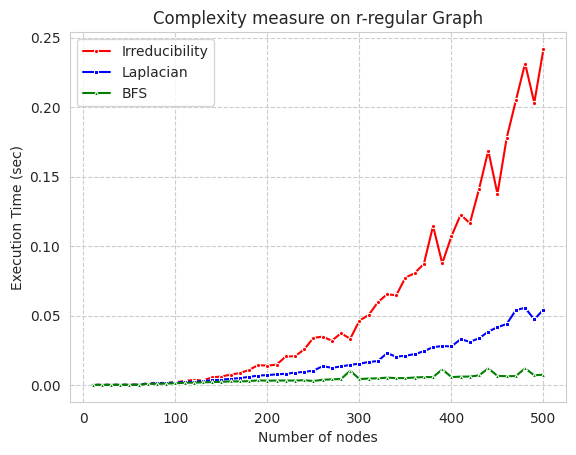

In [25]:
np.seterr(over='ignore')

# Definition of parameters
## K - number of nodes
K_values = np.arange(10, 502, 10)
## Number of repetitions for each value of K to get a robust estimate of execution times
num_repeats = 50

# Initialization of lists for results
irreducibility_times = np.zeros(len(K_values))
laplacian_times = np.zeros(len(K_values))
bfs_times = np.zeros(len(K_values))

# Loop over K to generate graphs and measure execution times
for i, K in enumerate(K_values):
    # Generate a r-regular random graph with K nodes and number of neighbors 8
    graph = nx.random_regular_graph(8, K)
    mat = nx.to_numpy_array(graph)

    # Initialize the times of the 3 methods
    irreducibility_time = 0
    laplacian_time = 0
    bfs_time = 0

    for _ in range(num_repeats):
        # Measure execution times for connectivity check using the irreducibility method
        irreducibility_time += get_time_run(check_connectivity_irreducibility, mat)
        # Measure execution times for connectivity check using the eigenvalue method of the Laplacian matrix
        laplacian_time += get_time_run(check_connectivity_eigen, mat)
        # Measure execution times for connectivity check using BFS
        bfs_time += get_time_run(check_connectivity_bfs, graph)
    irreducibility_times[i] = irreducibility_time/ num_repeats
    laplacian_times[i] = laplacian_time / num_repeats
    bfs_times[i] = bfs_time / num_repeats


df = pd.DataFrame({'Irreducibility': irreducibility_times,
                   'Laplacian': laplacian_times,
                   'BFS': bfs_times,
                   'k': K_values})

sns.set_style("whitegrid", {"axes.grid.color": ".9", "grid.linestyle": "--"})

# Plotting execution times versus K
sns.lineplot(df, x='k', y='Irreducibility', color='red', label='Irreducibility', marker='o', markersize=3)
sns.lineplot(df, x='k', y='Laplacian', color='blue', label='Laplacian', marker='s', markersize=3)
sns.lineplot(df, x='k', y='BFS', color='green', label='BFS', marker='^', markersize=3)
plt.xlabel('Number of nodes')
plt.ylabel('Execution Time (sec)')

plt.title('Complexity measure on r-regular Graph')
plt.legend()
plt.show()



In conclusion, we examined various methods for checking the connectivity of random networks and compared their execution times.




### Irreducibility method
The irreducibility method is based on the property that a network is connected if and only if its adjacency matrix is irreducible. This method is implemented by computing the adjacency matrix of the network and then checking its irreducibility.
The complexity of this approach depends on the computation of the power of the adjacency matrix, which is performed using the numpy function np.linalg.matrix_power. The complexity of raising a matrix to a power depends on the algorithm used by the library and typically has a complexity of O(log(n)) in terms of the number of multiplications needed. Therefore, the overall complexity of this irreducibility check is $O(n^3 * log(n))$, where n is the number of vertices in the graph.

### Eigenvalue method
The eigenvalue method of the Laplacian matrix exploits the relationship between the connectivity of a network and the eigenvalues of its Laplacian matrix.  The computational complexity of determining the eigenvalues of a matrix depends on the algorithm employed by the computing library, in particular we use np.linalg.eigvalsh which exploits the fact that the Laplacian matrix is symmetric to compute the eigenvalues only of the matrix.

### Breadth-first search
The breadth-first search (BFS) algorithm is a classic method for determining the connectivity of a network. The worst-case scenario for Breadth-First Search (BFS) in terms of computational complexity occurs when the graph is represented as an adjacency list and contains a large number of edges. In this case, the temporal complexity of BFS becomes O(V + E) - (adjaciancy lists dimensions).

---
# 4. Monte Carlo simulations
Let $\mathbb{p}_c(G)$ denote the probability that a graph G is connected. By running Monte Carlo simulations, estimate $\mathbb{p}_c(G)$ and produce two curve plots:

$\mathbb{p}_c(G)$ vs. p for Erd ̋os-R ́enyi graphs with K = 100.

$\mathbb{p}_c(G)$ vs. K, for K ≤ 100, for r-regular random graphs with r = 2 and r = 8.

In [26]:
# Same function of point 2 but with the return of a 0 or 1

def bfs(matrix):
    if isinstance(matrix, nx.Graph):
        G = matrix
    else:
        # Create undirected graph from adj_matrix
        G = nx.from_numpy_array(matrix)
    # Traverse the tree using bfs
    bfs_tree = nx.bfs_tree(G, source=0)
    # Check if all nodes were visited
    if len(bfs_tree.nodes) == len(matrix):
        return 1
    else:
        return 0

def irreducibility(matrix):
    n = len(matrix)
    identity = np.identity(n)
    power_matrix = np.linalg.matrix_power(matrix + identity, n - 1)
    # Check irreducibility (Wielandt lemma)
    if np.all(power_matrix > 0):
        return 1
    else:
        return 0


def eigenvalues(matrix, tol = 1e-16):
    D = np.diag(np.sum(matrix, axis=1))
    L = D - matrix
    # Get the eigenvalues and sort them
    eigen_vals = np.linalg.eigvalsh(L)
    # Check if the second eigenvalue is greater than zero
    if eigen_vals[1] > tol: # Account for numerical errors
        return 1
    else:
        return 0

In [55]:
# Parameters
## Number of neighbors into the r-Regular graph
r = 2
r2 = 8
## Range of the values
range_vals = range(1, 102, 2)

# Number of simulations
M = 1000


# matrix with the probability of connectivity of a r-Regular Graph with two different value of neighbors
# it's initialized to 0 for each value
prob_g = np.zeros((len(range_vals),2))

# index used to count from the first row ofthe prob_g matrix
i = 0
# for loop that performs the probability of connectivity for a r-Regular graph
for k in range_vals:
    # here we store the results of the connectivity chek on the two graph for each sample
    matrix = np.zeros((M, 2))
    # for loop to iterate through each sample graph
    for m in range(M):
        if k > r:
            # genaration of the r-Regular graph with r = 2
            G = generate_r_regular_graph(k, r)
            # connectivity check on each graph
            matrix[m, 0] = bfs(G)
        else:
            matrix[m, 0] = None

        if k > r2:
            # genaration of the r-Regular graph with r = 8
            G2 = generate_r_regular_graph(k, r2)
            matrix[m, 1] = bfs(G2)
        else:
            matrix[m, 1] = None

    # connectivity probability for each graph
    prob_g[i, :] = np.mean(matrix, axis=0)
    # in the next iteration we will save the results into a new row
    i += 1

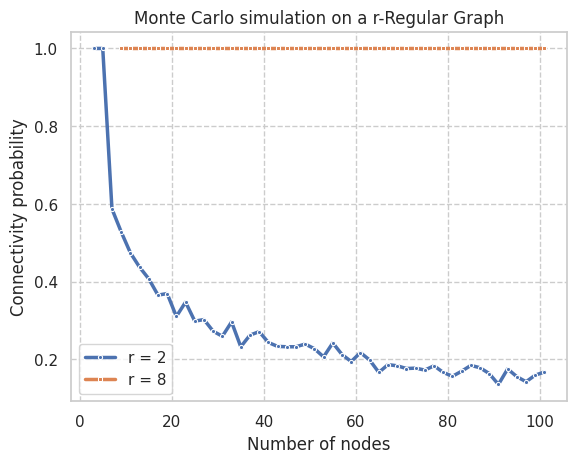

In [60]:
# DataFrame
df = pd.DataFrame(prob_g, columns=['Prob with r = 2', 'Prob with r = 8'])
df['k'] = range_vals

# Plot
sns.set_style("whitegrid", {"axes.grid.color": ".9", "grid.linestyle": "--"})
sns.lineplot(data=df, x='k', y='Prob with r = 2', label='r = 2', linewidth=2.5, marker='o', markersize=3)
sns.lineplot(data=df, x='k', y='Prob with r = 8', label='r = 8', linewidth=2.5, marker='s', markersize=3)

plt.xlabel('Number of nodes')
plt.ylabel('Connectivity probability')
plt.title('Monte Carlo simulation on a r-Regular Graph')
plt.legend()
plt.show()

In [57]:
# table of the results
df.head(11)

,Prob with r = 2,Prob with r = 8,k
0,NaN,NaN,1
1,1.000,NaN,3
2,1.000,NaN,5
3,0.587,NaN,7
4,0.528,1.0,9
5,0.474,1.0,11
6,0.437,1.0,13
7,0.407,1.0,15
8,0.365,1.0,17
9,0.369,1.0,19


In [ ]:
# number of nodes into the p-ER graph
k = 100

# matrix with the probability of connectivity of a p-ER Graph
# it's initialized to 0 for each value of p
prob_g2 = np.zeros((len(np.arange(0.01, 0.2, 0.01)),1))

# index used to count from the first row of the prob_g matrix
i = 0

# for loop that performs the probability of connectivity for a p-ER graph
for p in np.arange(0.01, 0.2, 0.01):

    # here we store the resoults of the connectivity chek
    matrix = np.zeros((1000, 1))

    # for loop to iterate through each sample graph
    for M in range(1000):

        # genaration of the p-ER graph
        G = generate_pER_graph(k, p)
        G = nx.to_numpy_array(G)

        # connectivity check
        matrix[M, 0] = bfs(G)

    # connectivity probability for each algorithm given p
    prob_g2[i, :] = np.mean(matrix, axis=0)
    # in the next iteration we will save the results into a new row
    i += 1

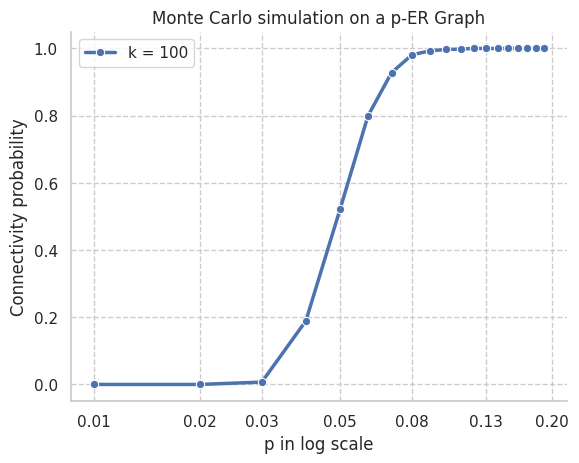

In [ ]:
# DataFrame
df2 = pd.DataFrame(prob_g2, columns=['Prob with k = 100'])
df2['p'] = np.arange(0.01, 0.2, 0.01)

# Plot
sns.set(style="whitegrid")
sns.set_style("whitegrid", {"axes.grid.color": ".9", "grid.linestyle": "--"})
sns.lineplot(data=df2, x=np.log(df2['p']), y='Prob with k = 100', label='k = 100', linewidth=2.5, marker='o')
sns.despine()

labels = [0.01, 0.02, 0.03, 0.05, 0.08, 0.13, 0.2]
plt.xticks(np.log(labels), [f'{p:.2f}' for p in labels])

plt.xlabel('p in log scale')
plt.ylabel('Connectivity probability')
plt.title('Monte Carlo simulation on a p-ER Graph')
plt.legend()
plt.show()

In [ ]:
# table of the results
df2

,Prob with k = 100,p
0,0.000,0.01
1,0.000,0.02
2,0.007,0.03
3,0.189,0.04
4,0.521,0.05
5,0.799,0.06
6,0.928,0.07
7,0.981,0.08
8,0.993,0.09
9,0.997,0.10


# **Assignment 2**

1.   Give a concise and accurate formal statement of the algorithm you use to evaluate the mean response time (i.e. how you conduct the statistical experiment to collect samples of **R**).
2.   Plot the mean response time $E[R]$ as a function of $N$ for $N$ ranging from 1 and 10000.
  * Let $R_{\text{baseline}}$ be the response time in case only server $A$ is used, i.e. the job is run locally on $A$.
  * In the plot normalize $E[R]$ with respect to $E[R_{\text{baseline}}]$.
3. Plot the Job running cost $S$ as a function of $N$ for $N$ ranging between 1 and 10000.
  * Let $S_{\text{baseline}}$ be the Job running cost in case only server $A$ is used, i.e. the job is run locally on $A$.
  * In the plot normalize $S$ with respect to $S_{\text{baseline}}$.
4. Explain in a concise and accurate way the results you have got. Highlight the takeaways of your analysis.

For a $n$-ports-switch fat tree, $\frac{n^3}{4}$ servers are supported.

We can break down the terms Ri = R1 + R2 + R3 into three distinct components. R2 signifies the duration required to complete the task itself.  R2 represents the time taken for TCP transmission from the source, denoted as A, to the N closest servers. Lastly, R3 denotes the TCP transmission time from the N closest servers back to the original source, A. The throughput, th, in our scenario, is determined by the number of servers considered.

In [ ]:
#Numerical values

C = 10
tau = 5e-6
L_f = 32000
L_o = 32000
mu_x = 28800
T_0 = 30
csi = 0.1
f = 48/1500
n = 64

From the given data, we can derive that:

$\mathbb{E}[R_{baseline}]$ = $T_0+\mathbb{E}[X] = 30 + 28800= 28830 \ sec$

$\mathbb{E}[S_{baseline}] = (1+\xi)\mathbb{E}[R_{baseline}] = (1+ 0.1) *28830= 31713 \ sec$

For the fat-tree topology with 64 ports switch, we will have 64 pods. Each pod is going to have 32 aggregation switch and 32 edge switch. We will have $(\frac{64}{2})^2 = 1024$ core switches and the newtork is going to support $\frac{64^3}{4} = 65536$ servers.

For 64-ports switches in a Fat-Tree Clos network each server has (k=64):


*   $\frac{k}{2} - 1 = 31$ *2-hops* neighbors     (hosts linked to the same edge switch);
*   $(\frac{k}{2})^2-1=1023$ *4-hops* neighbors   (hosts linked to the same pod);
*   $\frac{k^3}{4} - (\frac{k}{2})^2 = 64512$ *6-hops* neighbors  (hosts in the same network not linked to the same pod).


Fat Tree Topology

In [ ]:
import numpy as np
from tqdm import tqdm
import seaborn as sns

In [ ]:
# Constants and parameters
E_X = 28800  # seconds
T0 = 30  # seconds
Lf = 32000  # Gigabits
Lo = 32000  # Gigabits
xi = 0.1
f = 48 / 1500
C = 10  # Link capacity in Gigabits per second
tau = 5e-6  # Propagation delay in seconds
N_range = range(1, 10001)  # N ranging between 1 and 10000
R_baseline = 28830
S_baseline = 31713

The mean Response Time can be shown as:

$\mathbb{E}[R_i]$ = $T_0+\frac{\mathbb{E}[X]}{N}+\frac{L_f(1+f)}{N*TH_i}+\frac{L_{o,i}(1+f)}{N*TH_i}$
$\implies \mathbb{E}[R_i] \propto \frac{hi}{N}$

where $\frac{\mathbb{E}[X]}{N}$ is the time to run the job in each of the N servers and $\frac{L_f(1+f)}{N*TH_i}$ is contributed by the front propagation of data from A to N servers and $\frac{L_{o,i}(1+f)}{N*TH_i}$ is contributed by back propagation of the data between from N servers to root server A. f is the overhead contributed by the packets, the amount of memory it adds. Hence response time is inversely proportional to the number of servers and directly proportional to the number of hops, i.e distance between the servers.

In [ ]:
##defining the function to calculate throughput based on the fat-tree network which has number of hops specific in each case of N value.
def cal_throughput_ft(N, tau = 0.000005, C = 10):
  rtt = np.zeros(N)
  if N < 32:
    rtt[0:N] = 4*tau
  elif (N >= 32) and (N < 1024):
    rtt[0:32] = 4*tau
    rtt[32:N] = 8*tau
  else:
    rtt[0:32] = 4*tau
    rtt[32:1024] = 8*tau
    rtt[1024:] = 12*tau
  rtt_inv = 1/rtt
  sum_rtt_inv = np.sum(rtt_inv)
  th = C*rtt_inv/sum_rtt_inv
  return th
#for the data to flow from server A to N nearest servers, the following function will calculaate response times R_A->N
def A_to_Nservers_ft(N,Lf=32000, f=0.032):
  th = np.mean(cal_throughput_ft(N))
  respTimeA_N= Lf*(f+1)/(N*th)
  return respTimeA_N
#for the data to flow  N nearest servers back to server A, the following function will calculaate response times R_N->A
def Nservers_to_A_ft(N,Lo=32000, f=0.032):
  L_oi = np.random.uniform(0,2*Lo/N, N)
  th = cal_throughput_ft(N)
  respTimeN_A = (L_oi+f*L_oi)/th
  return np.max(respTimeN_A)
#the total response time for the full duration is R= R1 (base case) + R2 + R3 as follows:
def cal_response_time_ft(N, Ex=28800):
  xi = np.random.exponential(E_X/N,N)
  R1 = T0+np.max(xi)
  R2 = A_to_Nservers_ft(N)
  R3 = Nservers_to_A_ft(N)
  R = R1+R2+R3
  return R
#defining the simulation function to perform Monte Carlo simulations of size M and then take the mean of the response times.
def simulation_ft(M, N):
  r = np.zeros(M)
  for i in range(0,M):
    r[i] = cal_response_time_ft(N)
  return np.mean(r)

In [ ]:
FTsim_dictionary = {n:0 for n in range(1,10001)}
for n in tqdm(range(1,10001)):
    FTsim_dictionary[n] = simulation_ft(1000,n)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [22:53<00:00,  7.28it/s]


In [ ]:
FT_normalised_MRT = np.array(list(FTsim_dictionary.values()))/R_baseline

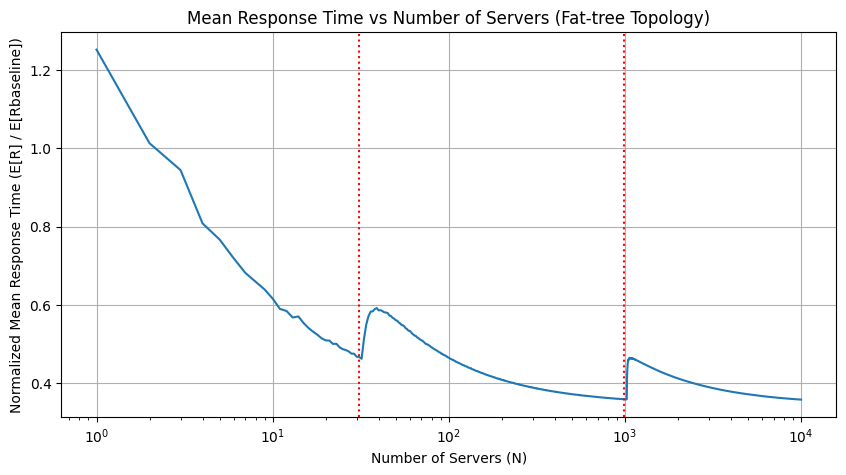

In [ ]:
from matplotlib import pyplot as plt
# Plot the results for Fat-tree topology
plt.figure(figsize = (10, 5))
plt.plot(range(1, 10001), FT_normalised_MRT)
plt.xlabel('Number of Servers (N)')
plt.ylabel('Normalized Mean Response Time (E[R] / E[Rbaseline])')
plt.title('Mean Response Time vs Number of Servers (Fat-tree Topology)')
plt.grid(True)
plt.axvline(x = 31, color = 'r', linestyle=':')
plt.axvline(x = 992, color = 'r', linestyle=':')
plt.xscale('log')  # Set the scale of the x-axis to logarithmic
plt.xticks([10**i for i in range(5)])
plt.show()

The job running cost can be shown as:

$\mathbb{S}$ = $\mathbb{E}[R_i]+\xi\mathbb{E}[\theta_i]$
$\implies \mathbb{S}$ = $\mathbb{E}[R_i]+ \xi\tau h_i$
$\implies \mathbb{S} \propto \frac{1}{N}$

since $\mathbb{E}[R_i] \propto \frac{1}{N}$

where $\mathbb{E}[\theta_i]$ is the average server time to run the job in each of the N servers and $h_i$ is number of hops between root server A and the nearest server i with the throughput $TH_i$.

In [ ]:
def calculate_theta(N, E_X=28800, T0 = 30):
  xi = np.random.exponential(N/E_X,N)
  Theta = T0+xi
  return np.sum(Theta)
def job_cost(M, N, xi=0.1):
  J = np.zeros(M)
  for i in range(0,M):
    J[i] = calculate_theta(N) #store M simulations of the thetas
  return xi*np.mean(J) #get the xi * mean theta

In [ ]:
JobSimulationDict = {n:0 for n in range(1,10001)}
for n in tqdm(range(1,10001)):
    JobSimulationDict[n] = job_cost(1000,n)

100%|██████████| 10000/10000 [13:14<00:00, 12.59it/s]


In [ ]:
S = np.array(list(FTsim_dictionary.values())) + np.array(list(JobSimulationDict.values()))
S = S/S_baseline
MLE = np.argmin(S)

In [ ]:
MLE #optimal value

333

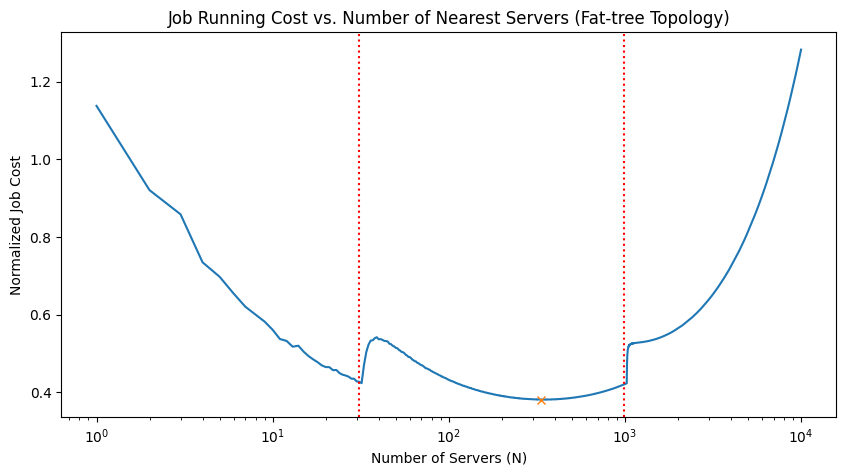

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(range(1, 10001),S)
plt.axvline(x = 31, color = 'r', linestyle=':')
plt.axvline(x = 992, color = 'r', linestyle=':')
plt.xlabel('Number of Servers (N)')
plt.ylabel('Normalized Job Cost')
plt.title('Job Running Cost vs. Number of Nearest Servers (Fat-tree Topology)')
plt.xscale('log')  # Set the scale of the x-axis to logarithmic
plt.xticks([10**i for i in range(5)])
plt.plot(333, S[333], marker='x')

We have already found that the Fat Tree Topology supports 65536 servers with n= 64-port switches. To build a Jellyfish Topology of the same size, the relation 32S = Servers where S is the number of switches must be preserved. Then, 32*S = 65536 yields that S = 2048 switches.

In [ ]:
import networkx as nx

In [ ]:
jellyfish = nx.random_regular_graph(32, 2048)
hosts = ['H'+str(i) for i in range(0, 65536)]
jellyfish.add_nodes_from(hosts)
switches = [node for node in jellyfish.nodes() if node not in hosts]

for i in range(0,2048):
  switch = switches[i]
  for j in range(32*i,32*(i+1)):
    jellyfish.add_edge(switch, hosts[j])

In [ ]:
A = hosts[np.random.randint(0,65536)]
all_neighbors = nx.single_source_shortest_path(jellyfish,A)

In [ ]:
M = 1000 #simulation size
hops_dict = {h:0 for h in [2,3,4,5]}
for j in range(0,M):
    A = hosts[np.random.randint(0,65536)] #randomly selecting the host A
    all_neighbors = nx.single_source_shortest_path(jellyfish,A)
    neighbors = {node:all_neighbors[node] for node in hosts if node != A}

    path_lengths = {node:(len(neighbors[node])-1) for node in neighbors.keys()}

    neighborood = sorted(path_lengths.items(), key=lambda x:x[1])
    hops = [t[1] for t in neighborood]
    counts = {v:hops.count(v) for v in set(hops)}
    hops_dict = {h:hops_dict[h]+counts[h] for h in counts.keys()}

In [ ]:
import math
{v:math.ceil(hops_dict[v]/M) for v in hops_dict.keys()}

{2: 31, 3: 1024, 4: 25073, 5: 39408}

In [ ]:
import pandas as pd
idx =['Jellyfish','Fat-tree']
df = pd.DataFrame({
    '2-hops Neighbors':['31','31'],
    '3-hops Neighbors':['31~1055', 'X'],
    '4-hops Neighbors':['1056~10000','31~1024'],
    '6-hops Neighbors':['X','1024~10000']
}, index=idx)

In [ ]:
df #summarising the distribution of hops among the servers

,2-hops Neighbors,3-hops Neighbors,4-hops Neighbors,6-hops Neighbors
Jellyfish,31,31~1055,1056~10000,X
Fat-tree,31,X,31~1024,1024~10000


In [ ]:
def cal_throughput_jf(N, tau = 5e-6, C = 10):
  rtt = np.zeros(N)
  if N <= 31:
    rtt[0:N] = 4*tau  #2 hops
  elif (N > 31) and (N < 1025):
    rtt[0:31] = 4*tau #2hops
    rtt[31:N] = 6*tau #3hops
  else:
    rtt[0:31] = 4*tau #2hops
    rtt[31:1024] = 6*tau #3hops
    rtt[1024:] = 8*tau #4hops
  rtt_inv = 1/rtt
  sum_rtt_inv = np.sum(rtt_inv)
  th = C*rtt_inv/sum_rtt_inv
  return th

def A_to_Nservers_jf(N,Lf=32000, f=0.032):
  th = np.mean(cal_throughput_jf(N))
  respTimeA_N= Lf*(f+1)/(N*th)
  return respTimeA_N
def Nservers_to_A_jf(N,Lo=32000, f=0.032):
  L_oi = np.random.uniform(0,2*Lo/N, N)
  th = cal_throughput_jf(N)
  respTimeN_A = (L_oi+f*L_oi)/th
  return np.max(respTimeN_A)
def cal_response_time_jf(N, Ex=28800):
  xi = np.random.exponential(E_X/N,N)
  R1 = T0+np.max(xi)
  R2 = A_to_Nservers_jf(N)
  R3 = Nservers_to_A_jf(N)
  R = R1+R2+R3
  return R
def simulation_jf(M, N):
  r = np.zeros(M)
  for i in range(0,M):
    r[i] = cal_response_time_jf(N)
  return np.mean(r)

In [ ]:
JFsim_dictionary = {n:0 for n in range(1,10001)}
for n in tqdm(range(1,10001)):
    JFsim_dictionary[n] = simulation_jf(1000,n)

100%|██████████| 10000/10000 [24:54<00:00,  6.69it/s]


In [ ]:
JF_normalised_MRT = np.array(list(JFsim_dictionary.values()))/R_baseline

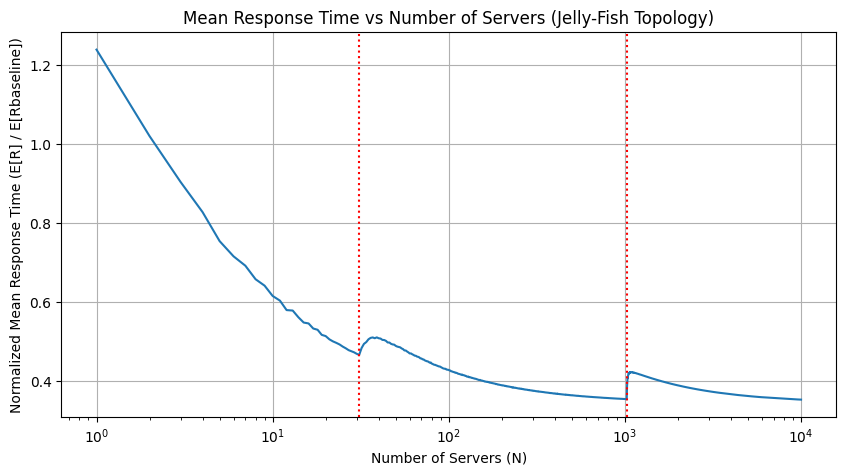

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(range(1, 10001), JF_normalised_MRT)
plt.xlabel('Number of Servers (N)')
plt.ylabel('Normalized Mean Response Time (E[R] / E[Rbaseline])')
plt.title('Mean Response Time vs Number of Servers (Jelly-Fish Topology)')
plt.grid(True)
plt.axvline(x = 31, color = 'r', linestyle=':')
plt.axvline(x = 1026, color = 'r', linestyle=':')
plt.xscale('log')  # Set the scale of the x-axis to logarithmic
plt.xticks([10**i for i in range(5)])
plt.show()

In [ ]:
S_jf = np.array(list(JFsim_dictionary.values())) + np.array(list(JobSimulationDict.values()))
S_jf = S_jf/S_baseline
MLE_jf = np.argmin(S_jf)

In [ ]:
MLE_jf #optimal value of the servers 

270

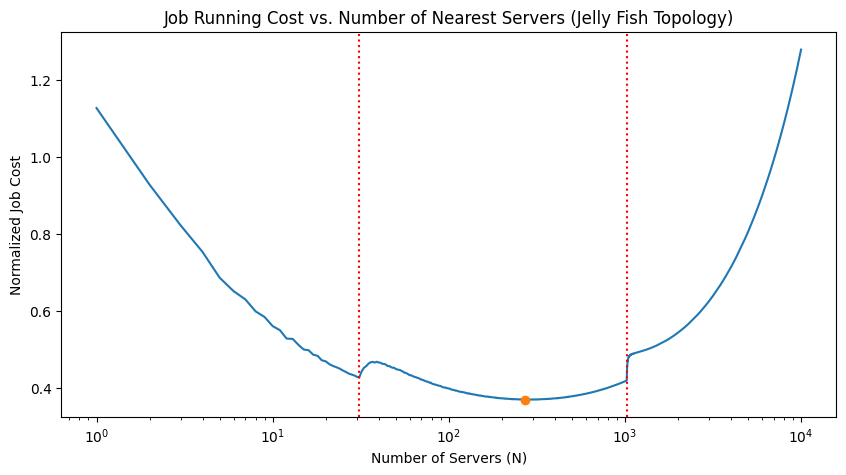

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(range(1, 10001),S_jf)
plt.axvline(x = 31, color = 'r', linestyle=':')
plt.axvline(x = 1026, color = 'r', linestyle=':')
plt.xlabel('Number of Servers (N)')
plt.ylabel('Normalized Job Cost')
plt.title('Job Running Cost vs. Number of Nearest Servers (Jelly Fish Topology)')
plt.xscale('log')  # Set the scale of the x-axis to logarithmic
plt.xticks([10**i for i in range(5)])
plt.plot(270, S_jf[270], marker='o')

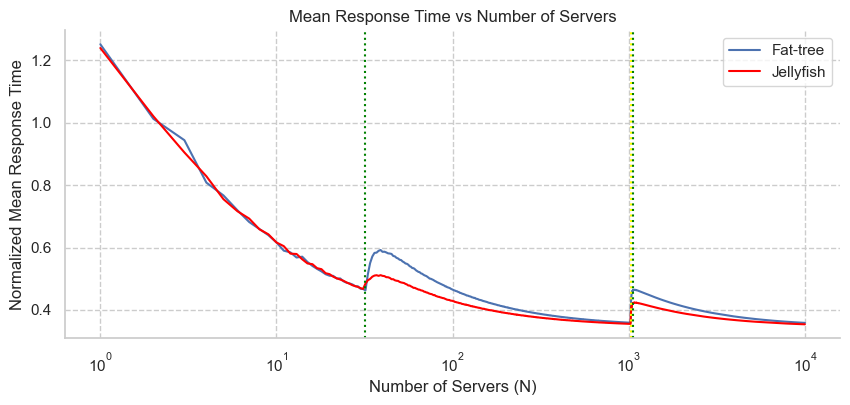

In [ ]:
sns.set(style="whitegrid")
sns.set_style("whitegrid", {"axes.grid.color": ".9", "grid.linestyle": "--"})
plt.figure(figsize = (10, 4))
plt.plot(range(1, 10001), FT_normalised_MRT,label='Fat-tree')
plt.plot(range(1, 10001), JF_normalised_MRT, color = 'red',label='Jellyfish')
plt.axvline(x = 32, color = 'green', linestyle=':')
plt.axvline(x=1024, color='yellow', linestyle=':')
plt.axvline(x = 1056, color = 'green', linestyle=':')
plt.xscale('log')  # Set the scale of the x-axis to logarithmic
plt.xticks([10**i for i in range(5)])
plt.xlabel('Number of Servers (N)')
plt.ylabel('Normalized Mean Response Time')
plt.title('Mean Response Time vs Number of Servers')
plt.legend()
sns.despine()
plt.show()

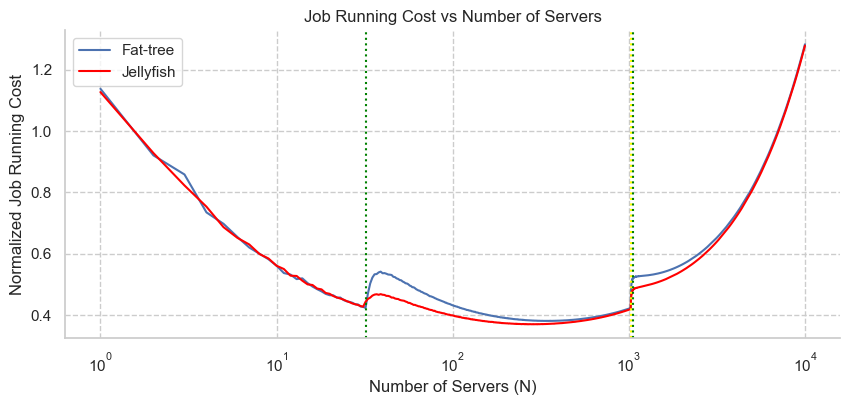

In [ ]:
sns.set(style="whitegrid")
sns.set_style("whitegrid", {"axes.grid.color": ".9", "grid.linestyle": "--"})
plt.figure(figsize = (10, 4))
plt.plot(range(1, 10001),S,label='Fat-tree')
plt.plot(range(1, 10001),S_jf, color = 'red',label='Jellyfish')
plt.axvline(x = 32, color = 'green', linestyle=':')
plt.axvline(x=1024, color='yellow', linestyle=':')
plt.axvline(x = 1056, color = 'green', linestyle=':')
plt.xscale('log')  # Set the scale of the x-axis to logarithmic
plt.xticks([10**i for i in range(5)])
plt.xlabel('Number of Servers (N)')
plt.ylabel('Normalized Job Running Cost')
plt.title('Job Running Cost vs Number of Servers')
plt.legend()
sns.despine()
plt.show()